In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

import sympy as sym
from ClassicalApproximation_class import Classical as CS

## example
Here we create a symbolic potential using SymPy
The package is built such that the length scale for the potential is set to 1
The pacckge accepts V_tild=x*V(x)
In this notebook we calculate the resulting cross-section in the case of repulsive Yukawa and Hulthen Potentials.

In [2]:
# Define symbols
x,  beta =sym.symbols('x, beta',positive=True)

# Define Yukawa potnetial V=exp(-x)/x-->V_tild=exp(-x)
yuk_tild=sym.exp(-x)

# Define the Hulthen potential V=exp(-x)/(1-exp(-x))
hult_tild=x*yuk_tild/(1-yuk_tild)

In [3]:
# Creat a classicalapproximation instance for Yukawa
clasic=CS(yuk_tild,x,order=1)
# Execute calculation
clasic.compute()

# Creat a classicalapproximation instance for Hulthen
clasic2=CS(hult_tild,x,order=1)
# Execute calculation
clasic2.compute()


The potential is repulsive, building classical deflection angles tables.
The potential is repulsive, building classical deflection angles tables.


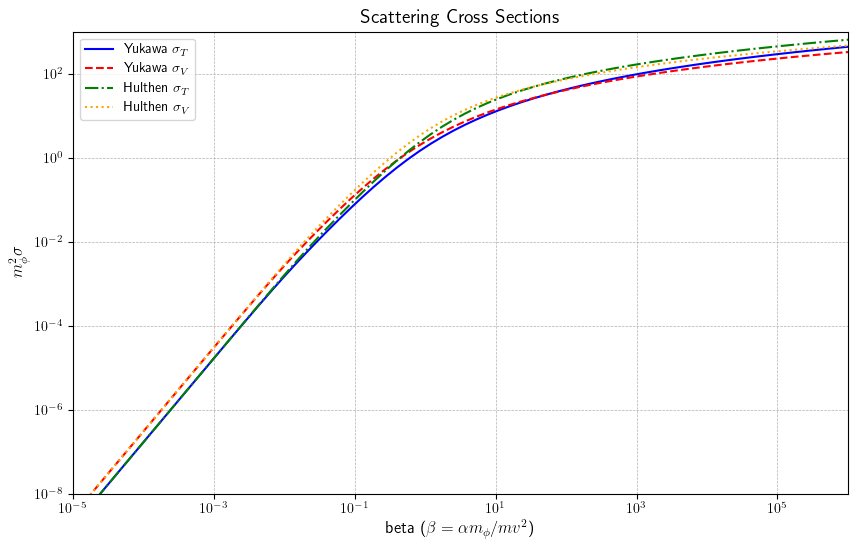

In [9]:
plt.figure(figsize=(10, 6))

plt.loglog(*clasic.calculate_xsec(), label='Yukawa $\sigma_T$', linestyle='-', color='blue')
plt.loglog(*clasic.calculate_xsec(func='viscosity'), label='Yukawa $\sigma_V$', linestyle='--', color='red')
plt.loglog(*clasic2.calculate_xsec(), label='Hulthen $\sigma_T$', linestyle='-.', color='green')
plt.loglog(*clasic2.calculate_xsec(func='viscosity'), label='Hulthen $\sigma_V$', linestyle=':', color='orange')

plt.ylim(1e-8, 1e3)
plt.xlim(1e-5, 1e6)

plt.xlabel('beta ($\\beta = \\alpha m_\\phi / mv^2$)', fontsize=12)
plt.ylabel('$m_\\phi^2\\sigma$', fontsize=12)
plt.title('Scattering Cross Sections', fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.legend()
plt.show()